In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('cropData.csv')

In [5]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df = df.drop_duplicates()

Data visualization

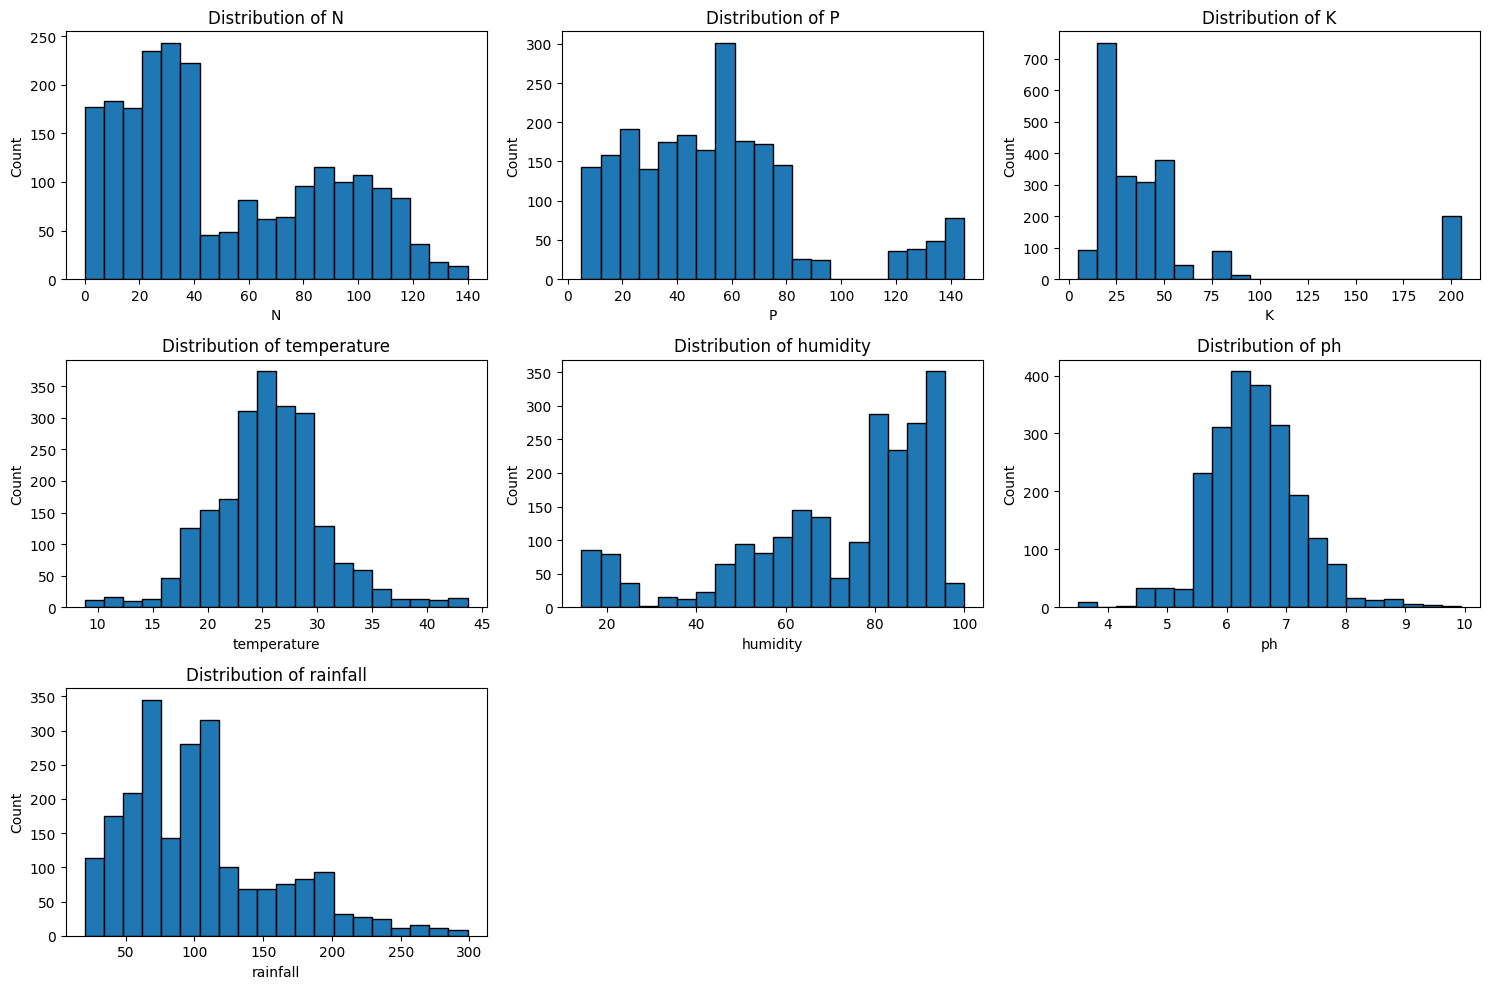

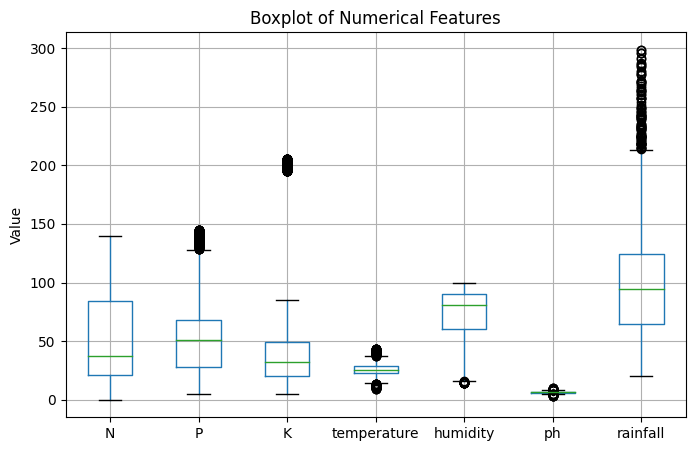

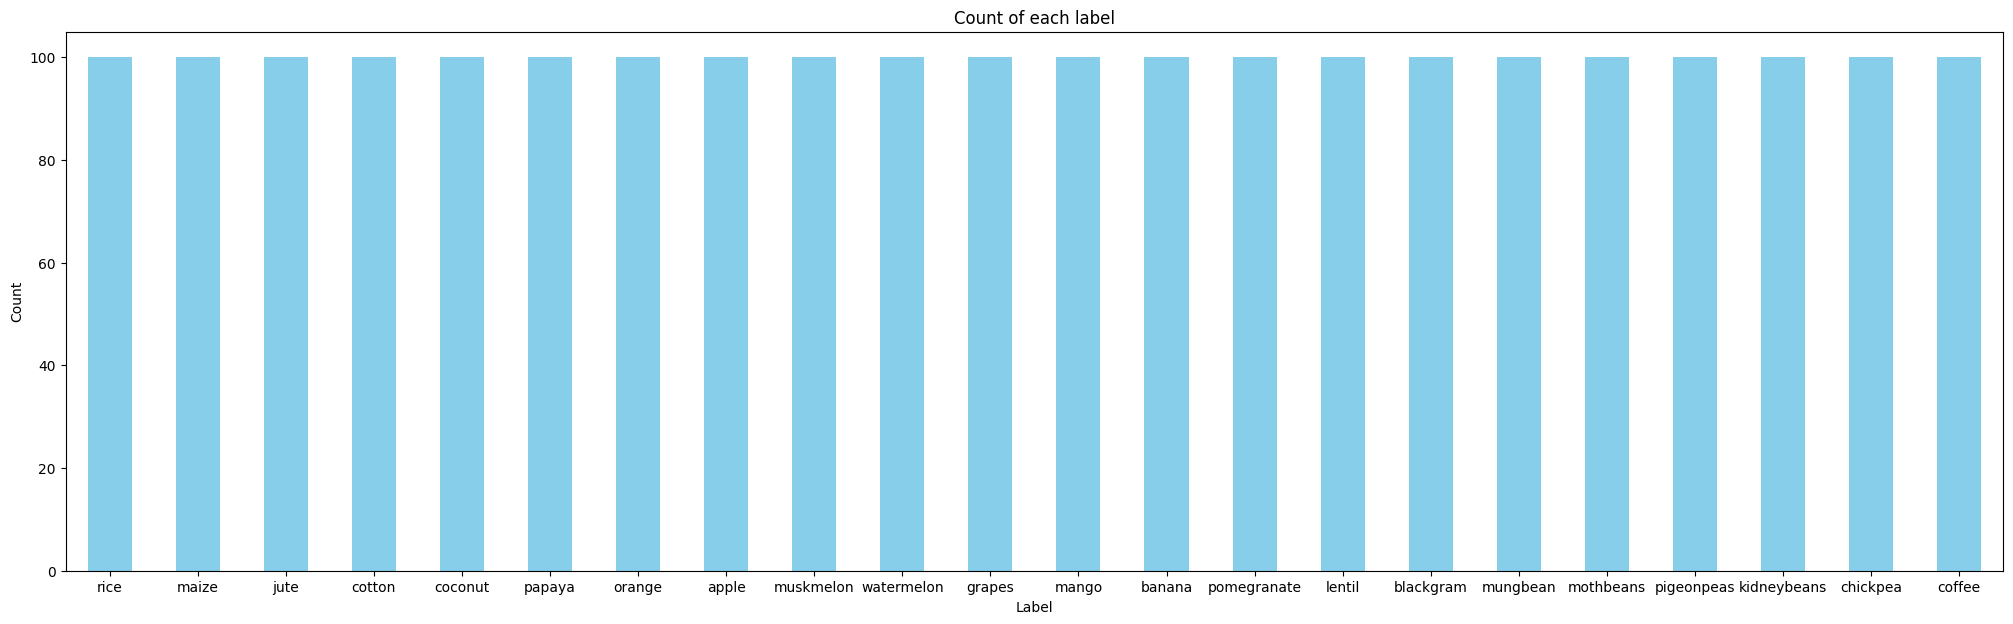

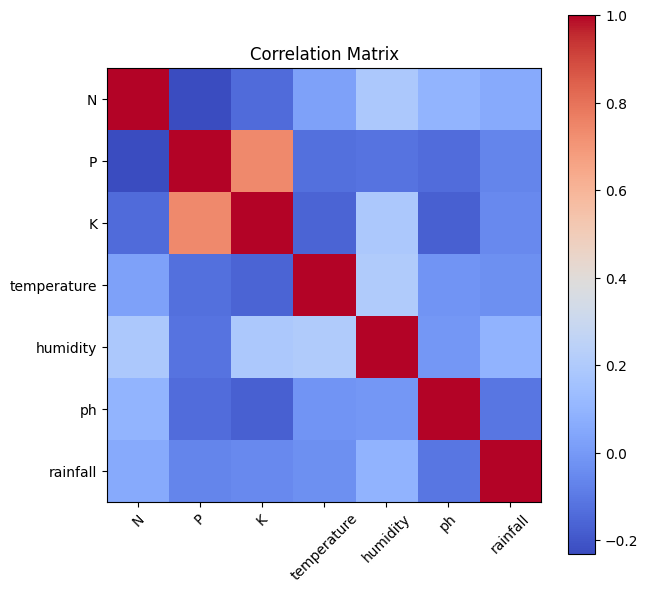

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset into a Pandas DataFrame df
# 'df' is the DataFrame with columns: N, P, K, temperature, humidity, pH, rainfall, label

# Summary statistics for numerical features (N, P, K, temperature, humidity, pH, rainfall)
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
summary_stats = df[numerical_features].describe()

# Distribution plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(8, 5))
df[numerical_features].boxplot()
plt.title('Boxplot of Numerical Features')
plt.ylabel('Value')
plt.show()

# Count plot for the 'label' feature
plt.figure(figsize=(25, 7))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of each label')
plt.xticks(rotation=0)
plt.show()

# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(7, 7))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(numerical_features)), numerical_features, rotation=45)
plt.yticks(range(len(numerical_features)), numerical_features)
plt.show()


c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

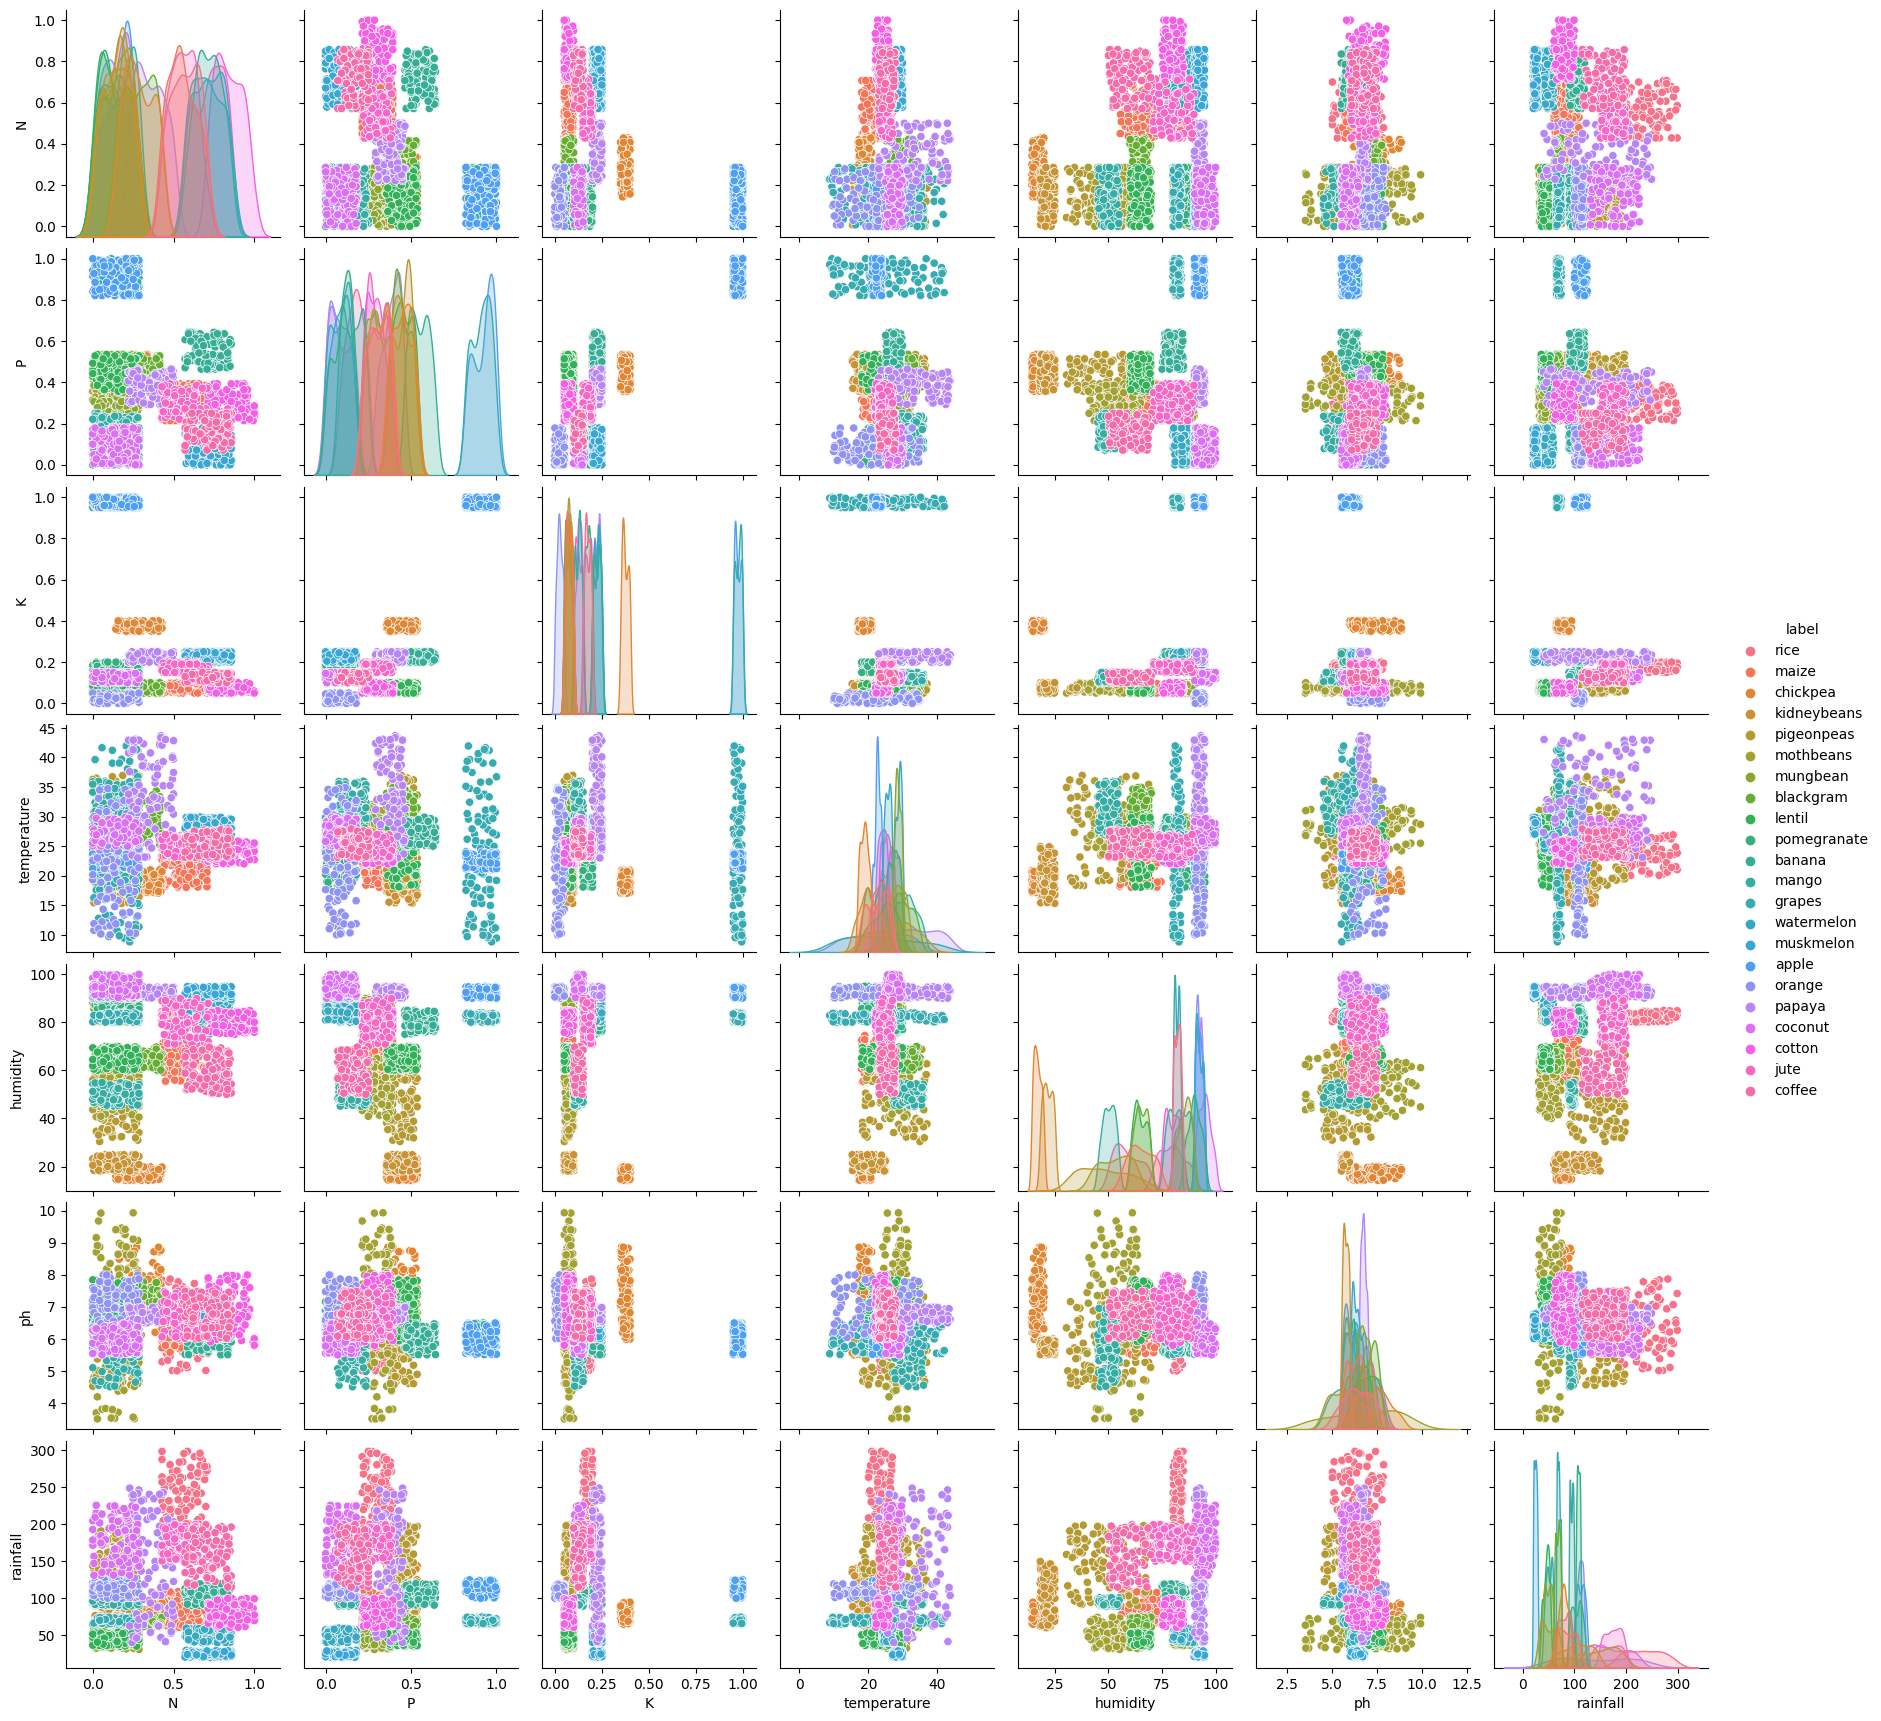

In [19]:
sns.pairplot(df,hue='label')

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Example: Min-Max scaling of numerical features
scaler = MinMaxScaler()
df[['N', 'P', 'K']] = scaler.fit_transform(df[['N', 'P', 'K']])


c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

Data splitting

In [14]:
from sklearn.model_selection import train_test_split

# X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall','label']]  # Features
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
y = df['label']  # Target variable (Crop names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Model Selection and Training

In [15]:
from sklearn.ensemble import RandomForestClassifier  

# Create and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

RandomForestClassifier(random_state=42)

Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:\n', report)


Accuracy: 0.9920454545454546
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        48
      banana       1.00      1.00      1.00        36
   blackgram       1.00      1.00      1.00        37
    chickpea       1.00      1.00      1.00        47
     coconut       1.00      1.00      1.00        43
      coffee       1.00      1.00      1.00        39
      cotton       1.00      1.00      1.00        40
      grapes       1.00      1.00      1.00        36
        jute       0.89      0.98      0.93        43
 kidneybeans       1.00      1.00      1.00        45
      lentil       0.97      1.00      0.99        37
       maize       1.00      1.00      1.00        37
       mango       1.00      1.00      1.00        41
   mothbeans       1.00      0.98      0.99        47
    mungbean       1.00      1.00      1.00        37
   muskmelon       1.00      1.00      1.00        35
      orange       1.00     

c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [17]:
import joblib


In [38]:
# Save the pre-trained model to a file named 'model.pkl'
joblib.dump(model, 'model.pkl')


['model.pkl']

In [31]:
# import joblib

# # Load the pre-trained model
# model = joblib.load('model.pkl')

# def get_user_input():
#     # Define a function to get user input
#     print("Enter the features for prediction:")
#     features = []
#     features.append(float(input("N: ")))
#     features.append(float(input("P: ")))
#     features.append(float(input("K: ")))
#     features.append(float(input("Temperature: ")))
#     features.append(float(input("Humidity: ")))
#     features.append(float(input("pH: ")))
#     features.append(float(input("Rainfall: ")))
#     return features

# def predict_crop(features):
#     # Predict the crop
#     prediction = model.predict([features])
#     return prediction[0]

# if __name__ == "__main__":
#     user_input = get_user_input()
#     predicted_crop = predict_crop(user_input)
#     print("Predicted Crop:", predicted_crop)


Enter the features for prediction:


Predicted Crop: apple


c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
# feature_names = ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH', 'Rainfall']


In [40]:
# input_features = [90, 42, 43, 21, 82.0, 6.5, 203.0]  # Replace with actual feature values
# input_data = dict(zip(feature_names, input_features))
# predicted_crop = model.predict([input_data])


c:\Users\1dt20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'dict'